In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import zipfile
import os

In [ ]:
zip_path = "/content/archive (4).zip"  # Change to your actual ZIP filename
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)

Files extracted to: /content/dataset


In [ ]:
data_path = "/content/dataset/PLD_3_Classes_256"  # Adjust based on extracted structure

In [ ]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 3258 images belonging to 3 classes.
Found 814 images belonging to 3 classes.


In [ ]:
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = build_model()
model.summary()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.7644 - loss: 0.7154 - val_accuracy: 0.7985 - val_loss: 0.6403
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8019 - loss: 0.6584 - val_accuracy: 0.7985 - val_loss: 0.6391
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7942 - loss: 0.6766 - val_accuracy: 0.7985 - val_loss: 0.6439
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7986 - loss: 0.6558 - val_accuracy: 0.7985 - val_loss: 0.6496
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.8017 - loss: 0.6528 - val_accuracy: 0.7985 - val_loss: 0.6498
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8028 - loss: 0.6495 - val_accuracy: 0.7985 - val_loss: 0.6525
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.7965 - loss: 0.6658 - val_accuracy: 0.7985 - val_loss: 0.6470
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7945 - loss: 0.6583 - val_accuracy: 0.79

In [ ]:
model.save("potato_leaf_disease_model.h5")

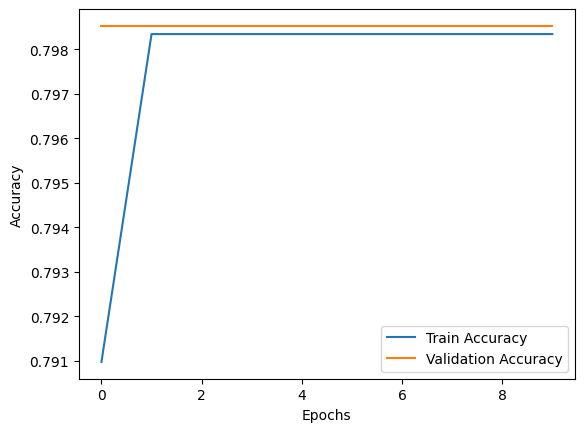

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model("potato_leaf_disease_model.h5")

img_path = r"/content/Early_Blight_2.jpg"
  # Replace with your test image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_labels = ['Healthy', 'Early Blight', 'Late Blight']
print("Predicted Class:", class_labels[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
Predicted Class: Early Blight
